In [20]:
from csv import writer
import time
from easysnmp import snmp_walk
from os import path

if not path.exists('cpu.csv'):
    with open('cpu.csv','w') as f:
        header = ['R1','R2','R3','R4','R5']
        writer_f = writer(f)
        writer_f.writerow(header)
        f.close()

def get_cpu(device_list): # get current cpu utilization of all devices
    cpu_data = []
    for host_ip in device_list:
        cpu = snmp_walk('.1.3.6.1.4.1.9.9.109.1.1.1.1.6', hostname=host_ip, community='public', version=2, use_sprint_value=True)
        for item in cpu:
            cpu_data.append(int(item.value))
    return cpu_data
    
device_list = ['198.51.100.11','198.51.100.12','198.51.100.13','198.51.100.14','198.51.100.15']
try:
    with open('cpu.csv','a') as f: # collect cpu data every 5 seconds and add to cpu.csv
        writer_f = writer(f)
        while True:
            new_data = get_cpu(device_list)
            writer_f.writerow(new_data)
            time.sleep(5)
except:
    print("Configure SNMPv2c on managed devices first.")

Configure SNMPv2c on managed devices first.


In [21]:
import pandas
import matplotlib.pyplot as plt

colnames = ['R1','R2','R3','R4','R5']
data = pandas.read_csv('cpu.csv',header=1,names=colnames)

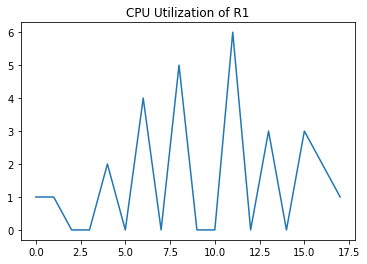

In [22]:
# plot R1 cpu utilization
r1_data = data.R1.tolist() # get all data of router R1
plt.plot(r1_data)
plt.title('CPU Utilization of '+'R1')
plt.savefig('{}_cpu.jpg'.format('R1'))
plt.show()

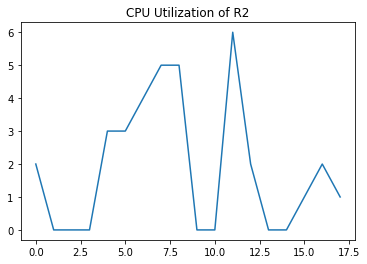

In [23]:
# plot R2 cpu utilization
r2_data = data.R2.tolist() # get all data of router R2
plt.plot(r2_data)
plt.title('CPU Utilization of '+'R2')
plt.savefig('{}_cpu.jpg'.format('R2'))
plt.show()

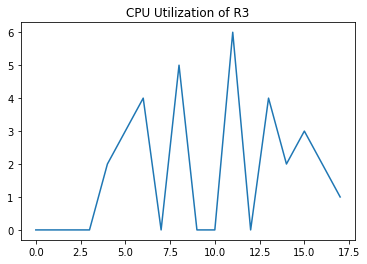

In [24]:
# plot R3 cpu utilization
r3_data = data.R3.tolist() # get all data of router R3
plt.plot(r3_data)
plt.title('CPU Utilization of '+'R3')
plt.savefig('{}_cpu.jpg'.format('R3'))
plt.show()

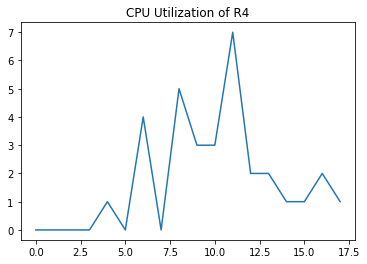

In [25]:
# plot R4 cpu utilization
r4_data = data.R4.tolist() # get all data of router R4
plt.plot(r4_data)
plt.title('CPU Utilization of '+'R4')
plt.savefig('{}_cpu.jpg'.format('R4'))
plt.show()

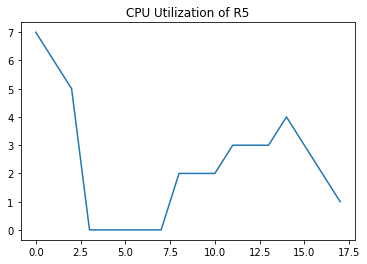

In [26]:
# plot R5 cpu utilization
r5_data = data.R5.tolist() # get all data of router R5
plt.plot(r5_data)
plt.title('CPU Utilization of '+'R5')
plt.savefig('{}_cpu.jpg'.format('R5'))
plt.show()